# Preparación del dataset

>(a) Cargue los datos de entrenamiento y pruebas como dataframes de *pandas*. Describa las variables
involucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distintos
y, si corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación
de pre-procesamiento de datos será obtener la hora del día desde el campo fecha (que en este momento es
de tipo string), creando una nueva columna denominada *hour* y de tipo *int*. Para hacer esta operación
se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo
la separación original.

El dataset corresponde al comportamiento de la renta de bicicletas en base a factores horarios y de calendario (fecha, hora, día feriado), meteorológicos (estación, clima, temperatura, humedad, etc), y del tipo de usuario (casual o registrado). 

En total se cuenta con 10886 ejemplos, repartidos en 6562 ejemplos (60%) para el conjunto de entrenamiento, 2177 ejemplos (20%) para el conjunto de validación y 2147 ejemplos (20%) para el conjunto de pruebas.

In [1]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
df.drop(df.columns[0],axis=1,inplace=True) #la primera columna es el identificador de la fila

print 'Número de ejemplos'
print 'Conjunto de entrenamiento:\t%d (%.3f)'%(len(dftrain),np.true_divide(len(dftrain),len(df)))
print 'Conjunto de validación:\t\t%d (%.3f)'%(len(dfval),np.true_divide(len(dfval),len(df)))
print 'Conjunto de prueba:\t\t%d (%.3f)'%(len(dftest),np.true_divide(len(dftest),len(df)))
print 'Total:\t\t\t\t%d'%len(df)

Número de ejemplos
Conjunto de entrenamiento:	6562 (0.603)
Conjunto de validación:		2177 (0.200)
Conjunto de prueba:		2147 (0.197)
Total:				10886


Cada ejemplo del dataset corresponde a una cierta hora de cada día de los años 2011 y 2012. Se debe notar que se encuentran faltantes los días 20-31 de cada mes.

Se puede ver que el dataset cuenta tanto con variables categóricas como númericas. Entre las variables categóricas se encuentran: *season*, *holiday*, *workingday* y *weather*.

Al ver un resumen del dataset se puede notar que en general la mayor parte del tiempo el clima es de tipo 1 (despejado, nublado, parcialmente nublado, nublado) que es lo normal.

In [2]:
print('\nSummary - dataframe completo:\n')
print(df.describe(percentiles =[.20,.40,.50,.60,.80]))

df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
20%        1.000000      0.000000      0.000000      1.000000     13.12000   
40%        2.000000      0.000000      1.000000      1.000000     17.22000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
60%        3.000000      0.000000      1.000000      1.000000     22.96000   
80%        4.000000      0.000000      1.000000      2.000000     27.88000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000

Para poder aprovechar la información de las fechas se crearon atributos que extrajeran la hora del día, el día de la semana, el mes y el año, etc.

In [3]:
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])

df['yearmonth'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%y%m'))
df['yearmonth'] = pd.to_numeric(df['yearmonth'])

Al ver histogramas de la respuesta se puede ver que la mayoría de los días se tienden a rentar pocas bicicletas. Cabe notar que no hay ningún día que no se renten bicicletas (siempre se renta al menos una). En general parecieran haber más rentas por usuarios registrados que por usuarios casuales.

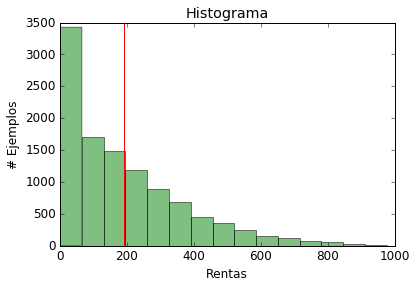

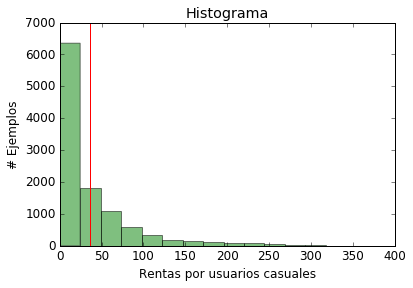

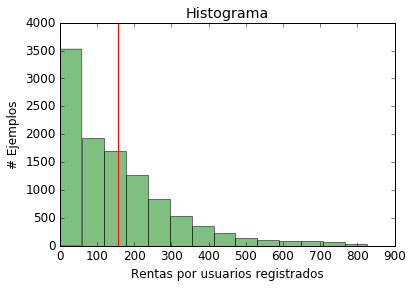

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 12.0
#### Dibuja un histograma
def draw_hist(x,bins,xlabel,ylabel,show_avg = True):
    n, bins, patches = plt.hist(x, bins, facecolor='green', alpha=0.5)
    axes = plt.gca()    
    ymin, ymax = axes.get_ylim()
    if show_avg: plt.plot((x.mean(),x.mean()),(0,ymax),'r-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(r'Histograma')
    plt.show()  


#Histograma de cuenta
df.ix[:,'count']
x = df.ix[:,'count'].values

draw_hist(df.ix[:,'count'].values, 15, 'Rentas', '# Ejemplos')
draw_hist(df.ix[:,'casual'].values, 15, 'Rentas por usuarios casuales', '# Ejemplos')
draw_hist(df.ix[:,'registered'].values, 15, 'Rentas por usuarios registrados', '# Ejemplos')


La temperatura tiene una distribución en donde las temperaturas que se encuentran entre 10°C y 30°C no varían tanto en el número de ejemplos. Parecieran haber más ejemplos con temperaturas cercanas a los 20°C y 25°C.

En cuanto a la temperatura aparente pareciera ser menos igualitario habiendo una suerte de tendencia hacia el valor de 32°C aunque valores cercanos a los 27°C también se repiten bastante

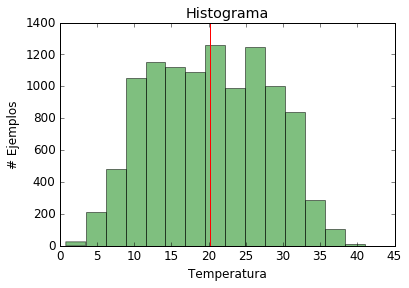

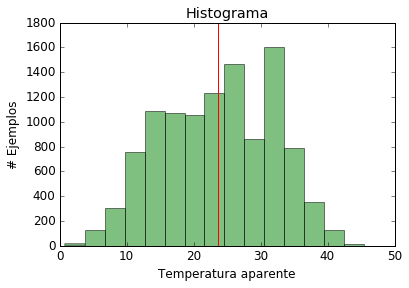

In [5]:
draw_hist(df.ix[:,'temp'].values, 15, 'Temperatura', '# Ejemplos')
draw_hist(df.ix[:,'atemp'].values, 15, 'Temperatura aparente', '# Ejemplos')

La humedad (*humidity*) tiende a tener más valores altos que bajos aunque hay cierto balance entre los distintos valores.

La velocidad del viento (*windspeed*) tiende a tomar valores más bajos con un mayor desbalance que el de las otras variables.

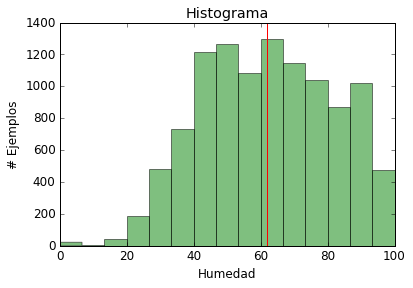

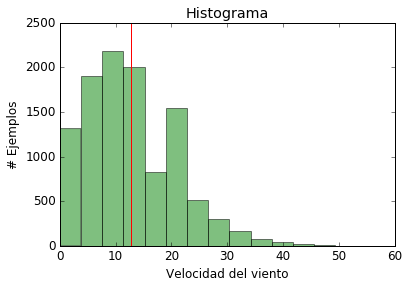

In [6]:
draw_hist(df.ix[:,'humidity'].values, 15, 'Humedad', '# Ejemplos')
draw_hist(df.ix[:,'windspeed'].values, 15, 'Velocidad del viento', '# Ejemplos')

En cuanto al clima la mayoría de los ejemplos son de tipo 1 con un 66% de los ejemplos. 

El segundo más frecuente es de tipo 2 (Neblina + Nublado, Neblina + Nubosidad parcial, Neblina) con el 26% de los ejemplos. Esto puede deberse a que en la madrugada 

Hay un solo ejemplo con clima tipo 4 (Lluvia pesada + granizo + tormenta eléctrica + neblina, Nieve + niebla)

In [9]:
KAGG EVAL TEST =	0.313119
x = df.ix[:,'weather'].values
print "# de ejemplos por clima:"
for w in range(1,5):
    tipo = np.array([i for i in x if i == w])
    print "\tTipo %d:%d (%.3f)"% (w,len(tipo),100*np.true_divide(len(tipo),len(x)))


# de ejemplos por clima:
	Tipo 1:7192 (66.067)
	Tipo 2:2834 (26.033)
	Tipo 3:859 (7.891)
	Tipo 4:1 (0.009)


Al ver un gráfico de tiempo (por año-mes) vs la cantidad de rentas se puede ver que hay más rentas de usuarios registrados que de usuarios casuales y aportan la mayor cantidad de las rentas. 

Se puede ver que los meses de diciembre, enero y febrero registran una caída considerable en la renta de bicicletas, mientras que junio y julio parecieran ser los mejores meses del año 2011, mientras que junio y julio para el año 2012.

También hay diferencia entre años con el año 2012 teniendo claramente una mayor cantidad de bicicletas rentadas que el 2011.

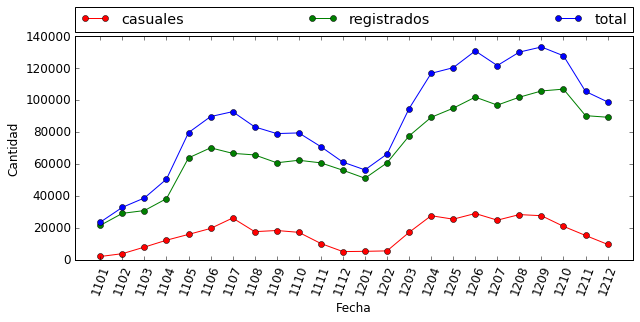

In [5]:
df2 = df.ix[:,['yearmonth','casual','registered','count']]
df2 = df2.groupby(['yearmonth'],group_keys = True)

xticks = [name for name,group in df2]
dfp = df2.sum()

plt.figure(figsize=(10, 4))
plt.plot(dfp['casual'].values,'ro-', label='casuales')
plt.plot(dfp['registered'].values,'go-', label='registrados')
plt.plot(dfp['count'].values,'bo-', label='total')

plt.xticks(range(len(df2)),xticks,rotation=70)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Fecha')
plt.ylabel('Cantidad')

plt.margins(x=0.05)
plt.show()


Al analizar por día de la semana se puede observar que existe una diferencia entre el día de la semana y el fin de semana. Durante el fin de semana se tiende a ver una baja en las rentas por usuarios registrados, mientras que un alza por usuarios casuales. 

Esto se puede deber a que los usuarios registrados rentan la bicicletas para transportarse a sus escuelas y trabajos, mientras que los usuarios casuales las rentan para salir a pasear y lo hacen durante el fin de semana que tienen tiempo.

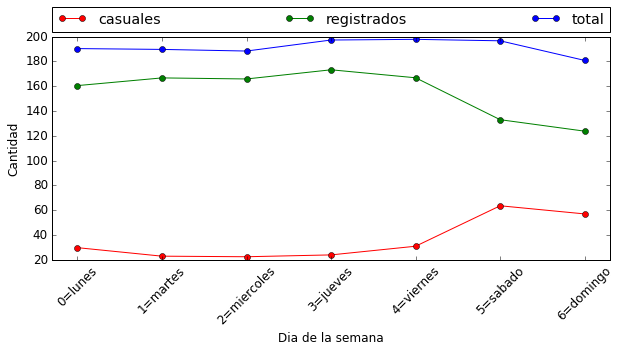

In [11]:
df2 = df.ix[:,['cday','casual','registered','count']]
df2 = df2.groupby(['cday'],group_keys = True)

xticks = [name for name,group in df2]
dfp = df2.mean()

#days = ['1=spring','2=summer','3=autumn','4=winter']
xticks = ['0=lunes','1=martes','2=miercoles','3=jueves','4=viernes','5=sabado','6=domingo']
#xticks = [name for name,group in df2]

plt.figure(figsize=(10, 4))
plt.plot(dfp['casual'].values,'ro-', label='casuales')
plt.plot(dfp['registered'].values,'go-', label='registrados')
plt.plot(dfp['count'].values,'bo-', label='total')

plt.xticks(range(len(df2)),xticks,rotation=45)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad')

plt.margins(x=0.05)
plt.show()

Al analizar por hora del día se puede ver que ambos usuarios tienden a arrendar las bicicletas principalmente entre las 08:00 y las 20:00.

Se puede apreciar un alza en las rentas principalmente por usuarios registrados cerca de las 08:00. Esto podría deberse a lo indicado anteriormente de usuarios que usan las bicicletas para transportarse al trabajo o a la escuela.

Luego, se observa otra alza cerca de las 17:00 probablemente del mismo público que las renta para volver a sus hogares, pero también de usuarios que a esa hora las usan para pasear.

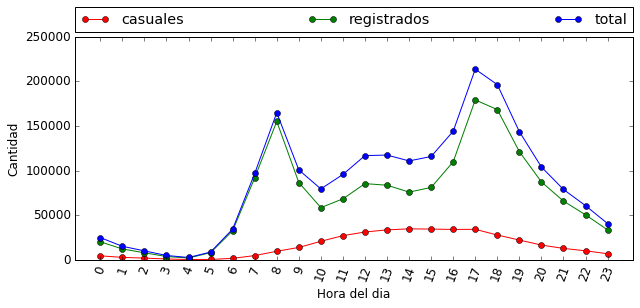

In [12]:
df2 = df.ix[:,['hour','casual','registered','count']]
df2 = df2.groupby(['hour'],group_keys = True)

xticks = [name for name,group in df2]
dfp = df2.sum()

#days = ['1=spring','2=summer','3=autumn','4=winter']
#xticks = ['1=invierno','2=primavera','3=verano','4=otono']
xticks = [name for name,group in df2]

plt.figure(figsize=(10, 4))
plt.plot(dfp['casual'].values,'ro-', label='casuales')
plt.plot(dfp['registered'].values,'go-', label='registrados')
plt.plot(dfp['count'].values,'bo-', label='total')

plt.xticks(range(len(df2)),xticks,rotation=70)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Hora del dia')
plt.ylabel('Cantidad')

plt.margins(x=0.05)
plt.show()

# Árbol de Regresión

>(b) Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. Con este fin,
construya una matriz $X_{train}$ de forma $n_{train} × d_1$ que contenga los datos de entrenamiento en sus filas,
seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente además, la
función de evaluación que hemos definido anteriormente para este problema. Evalúe el árbol de regresión
ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un
gráfico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo
con puntaje del orden de 0.59, lo que lo dejaría más o menos en la posición 2140 de la competencia.

Inicialmente se entrenó un árbol de regresión usando los atributos *season*, *holiday*, *workingday*, *weather*, *temp*, *atemp*, *humidity*, *windspeed* y *hour*. Se entrenó para la predicción de la cantidad total de bicicletas rentadas *count*.

Para la evaluación del modelo se tomó en cuenta el error logarítmico cuadrático medio por la raíz (*Root Mean Square Logaritmic Error* o *RMSLE*). El *RMSLE* penaliza en mayor medida un valor sub-estimado que un sobre-estimado.

In [4]:
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

El árbol de regresión obtuvo un *RMSLE* de 0.0285 para el conjunto de entrenamiento, de 0.554 para el conjunto de validación y de 0.5742 para el conjunto de pruebas. Esto da a entender que se produce un notable sobre-ajuste de los datos pues obtiene un buen puntaje en el conjunto de entrenamiento, pero bastante mediocre en los conjuntos de pruebas y validación.

In [9]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt



features = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']
Xdf=df.ix[:,features]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)

print "SCORE TRAIN=%f"%model.score(X_train,Y_train)
print "SCORE VALID=%f"%model.score(X_val,Y_val)
print "SCORE TEST=%f"%model.score(X_test,Y_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

print "RMSLE TRAIN =%f"%eval_bikemodel(Y_pred_train,Y_train)
print "RMSLE VALID =%f"%eval_bikemodel(Y_pred_val,Y_val)
print "RMSLE TEST =%f"%eval_bikemodel(Y_pred_test,Y_test)

SCORE TRAIN=0.999193
SCORE VALID=0.711209
SCORE TEST=0.703388
RMSLE TRAIN =0.028516
RMSLE VALID =0.554511
RMSLE TEST =0.574239


El árbol entrenado tuvo una profundidad máxima de 28 niveles.

Se puede observar la importancia de las características por medio de la importancia de Gini. Mientras más alto, más importante. La característica más importante viene a ser en este caso la de hora, seguido por temperatura y luego si es día de trabajo (*workingday*).

Esto hace sentido pues como se observó en la sección anterior en donde se veía una notable diferencia en la renta de bicicletas según la hora. La temperatura también pues un usuario podría estar dispuesto a usar una bicicleta en un día de temperatura media, que un día muy frío o muy caluroso. Por último es natural pensar que durante un día de trabajo la renta de bicicletas debería aumentar sobretodo en los horarios que los usuarios deben dirigirse a trabajar.

In [10]:
print 'Profundidad del árbol:',model.tree_.max_depth
print 'Número de nodos:',model.tree_.node_count
print 'Número de hojas:',len([x for x in model.tree_.children_left if x == -1])

print 'Importancia de características:'
for i in range(0,len(model.feature_importances_) ):
    print "\t%s:   \t%f"%(features[i],model.feature_importances_[i])


Profundidad del árbol: 28
Número de nodos: 12513
Número de hojas: 6257
Importancia de características:
	season:   	0.041184
	holiday:   	0.004795
	workingday:   	0.080056
	weather:   	0.025364
	temp:   	0.127637
	atemp:   	0.023574
	humidity:   	0.067659
	windspeed:   	0.035573
	hour:   	0.594158


Al comparar cualitativamente la predicción con el valor verdadero se puede observar que el árbol de regresión usado logra cierta predicción. La predicción del árbol no es completamente al azar sino que tiene tendencia a predecir valores con cierta cercanía al valor verdadero, pero de todas formas con una gran cantidad de ejemplos mal estimados. Se debe notar que el árbol logra estimar valores más bajos cuando el verdadero es bajo.

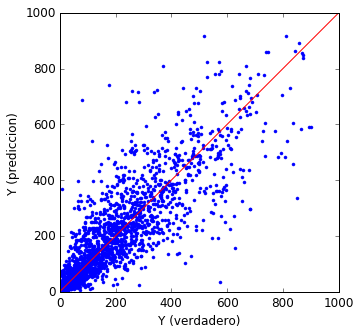

In [15]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

>(c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros
del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podría intentar limitar la profundidad
del árbol (¿por qué ésto debiese ayudar?). Naturalmente, está absolutamente prohibido tomar este
tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando sobre el
conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada u otra técnica
automática, tiene la ventaja de poder usar el conjunto de validación como parte del entrenamiento.
Con estas modificaciones debiese poder mejorar su ranking en unas 300 posiciones.

En vista de que es posible que el árbol este sobre-ajustado se procederá a limitar la altura del árbol generado. Por defecto, la generación de un árbol de regresión continúa hasta que las hojas sean puras. Aunque las hojas del árbol queden impuras.

Para ello se utilizó un método iterativo. Se busco el mejor árbol limitando su profundidad a $n$ niveles con $n \in \{1,2,...,init\}$ con $init = 28$ siendo la profundidad del árbol obtenido anteriormente. El mejor árbol era aquel que reducía lo más posible el error *RMSLE* sobre el conjunto de validación.

Se obtuvo así un nuevo árbol con profundidad 10. El puntaje *RMSLE* de este árbol fue de 0.3386 para el conjunto de entrenamiento, de 0.4762 para el conjunto de validación y de 0.5164 para el conjunto de pruebas. 

Se puede observar que aunque *RMSLE* aumentó para el conjunto de entrenamiento, disminuyó tanto para el conjunto de validación como de pruebas. Este árbol tiene mejor capacidad de generalización y mejor rendimiento con datos no vistos durante el entrenamiento.

In [11]:
def get_best_tree(X_train,Y_train,X_val,Y_val,X_test,Y_test):
	model = Tree(random_state=0)
	model.fit(X_train,Y_train)
	#print "SCORE TRAIN=\t%f"%model.score(X_train,Y_train)
	#print "SCORE VALID=\t%f"%model.score(X_val,Y_val)
	#print "SCORE TEST=\t%f"%model.score(X_test,Y_test)

	Y_pred_train = model.predict(X_train)
	Y_pred_val = model.predict(X_val)
	Y_pred_test = model.predict(X_test)

	#print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)	
	#print "KAGG EVAL VAL =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
	#print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

	init_max_depth =  model.tree_.max_depth 
	best_score = eval_bikemodel(Y_pred_val,Y_val)
	best_depth = init_max_depth #La profundidad del arbol sin limite

	scores_train = []
	scores_val = []
	scores_test = []

	#Buscamos la mejor profundidad
	for depth in range(1,init_max_depth + 1):
		model = Tree(random_state=0,max_depth=depth)
		model.fit(X_train,Y_train)
		Y_pred_train = model.predict(X_train)
		Y_pred_val = model.predict(X_val)
		Y_pred_test = model.predict(X_test)
		scores_train.append(eval_bikemodel(Y_pred_train,Y_train))
		scores_val.append(eval_bikemodel(Y_pred_val,Y_val))
		scores_test.append(eval_bikemodel(Y_pred_test,Y_test))
		if eval_bikemodel(Y_pred_val,Y_val) <= best_score :
			best_depth = depth
			best_score = eval_bikemodel(Y_pred_val,Y_val)

	model = Tree(random_state=0,max_depth=best_depth)
	model.fit(X_train,Y_train)
	return model, best_depth, init_max_depth, scores_train, scores_val, scores_test


model, best_depth, init_max_depth, scores_train, scores_val, scores_test = get_best_tree(X_train,Y_train,X_val,Y_val,X_test,Y_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

print 'Profundidad del árbol:',model.tree_.max_depth

print "SCORE TRAIN=\t%f"%model.score(X_train,Y_train)
print "SCORE VALID=\t%f"%model.score(X_val,Y_val)
print "SCORE TEST=\t%f"%model.score(X_test,Y_test)
print ""
print "RMSLE TRAIN=\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "RMSLE VALID=\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "RMSLE TEST=\t%f"%eval_bikemodel(Y_pred_test,Y_test)

Profundidad del árbol: 10
SCORE TRAIN=	0.876533
SCORE VALID=	0.799606
SCORE TEST=	0.770304

RMSLE TRAIN=	0.338635
RMSLE VALID=	0.476274
RMSLE TEST=	0.516396


El árbol entrenado tuvo una profundidad máxima de 10 niveles. Se puede ver una reducción en el número de nodos y hojas lo cual indica que no solo este árbol tiene mejor generalización sino que también necesita menos memoria.

Al observar la importancia de las características se puede ver que la hora y la temperatura se mantuvieron en la cima, pero la hora aumentó en su importancia, mientras que la temperatura disminuyó.

In [12]:
print 'Profundidad del árbol:',model.tree_.max_depth
print 'Número de nodos:',model.tree_.node_count
print 'Número de hojas:',len([x for x in model.tree_.children_left if x == -1])

print 'Importancia de características:'
for i in range(0,len(model.feature_importances_) ):
    print "\t%s:   \t%f"%(features[i],model.feature_importances_[i])


Profundidad del árbol: 10
Número de nodos: 1489
Número de hojas: 745
Importancia de características:
	season:   	0.036730
	holiday:   	0.004383
	workingday:   	0.090461
	weather:   	0.019522
	temp:   	0.124770
	atemp:   	0.012008
	humidity:   	0.037097
	windspeed:   	0.008210
	hour:   	0.666818


Al comparar la profundidad y el *RMSLE* obtenido durante el ajuste de la profundidad se puede observar que el *RMSLE* de los distintos conjuntos se mantiene a un nivel bastante similar hasta que se llega a 8 niveles.

Pasado este punto comienza a apreciar un sobre-ajuste con el error del conjunto de entrenamiento disminuyendo a medida que se agregan más niveles, mientras que el error de los conjuntos de validación y pruebas manteniéndose a casi el mismo nivel.

Se debe notar que el error mínimo en el conjunto de validación y entrenamiento se produce al usarse 10 niveles que fue lo obtenido.

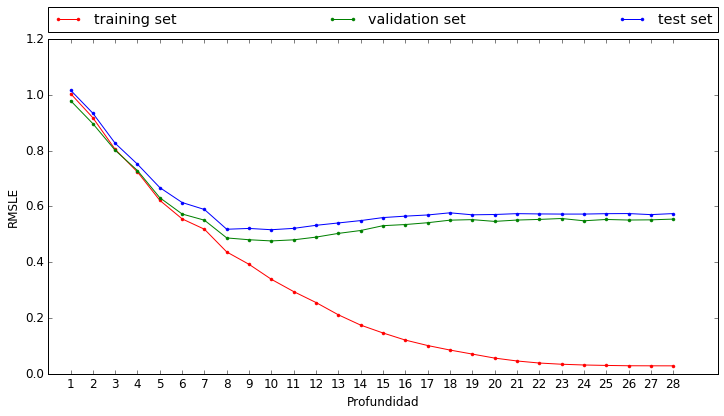

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,init_max_depth+1),scores_train,'r.-',label='training set')
plt.plot(range(1,init_max_depth+1),scores_val,'g.-', label='validation set')
plt.plot(range(1,init_max_depth+1),scores_test,'b.-', label='test set')

plt.xticks(range(1,init_max_depth+1))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Profundidad')
plt.ylabel('RMSLE')
plt.show()

Se puede notar un cambio en el gráfico de comparación del valor verdadero y predicho. Ahora se observan ciertos puntos alineados horizontalmente sobre todo para las predicciones de mayor valor. Esta alineación se produce debido a que al tener menos niveles se vuelve más probable que se repita una predicción para varios datos. Al tener más niveles estos datos habrían tenido alguna diferencia en la predicción.

Se puede observar que ahora la predicción se concentra más en los valores inferiores que al usar el árbol sin límites.

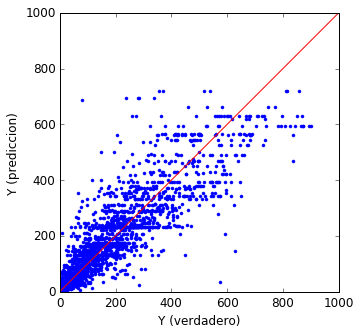

In [19]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

>(d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación
utilizada para aprender desde los datos. Por ejemplo, los histogramas que construyó en el punto
(a) así como la forma especial de la función de evaluación, sugieren una cierta transformación de la
variable respuesta. Podría intentar también normalizando los datos o normalizando la respuesta. Otra
opción es intentar rescatar algo más acerca de la fecha (anteriormente sólo se extrajo la hora), como
por ejemplo el año o el día de la semana (’lunes’,’martes’, etc) que corresponde. Sea creativo, este
paso le debiese reportar un salto de calidad muy significativo. Una observación importante es que
si hace una transformación a la variable respuesta (por ejemplo raíz cuadrada), debe invertir esta
transformación antes de evaluar el desempeño con *eval_bikemodel* (por ejemplo, elevar al cuadrado
si tomó raíz cuadrada). Con modificaciones de este tipo, podría mejorar su ranking en unas 1000
posiciones, entrando ya al top-1000 con un score del orden de 0.45.

Se probó mejorar la predicción agregando más características al modelo. Para ello se incluyó el día de la semana (*cday*) y el año-mes (*yearmonth*). Anteriormente se vio que respecto del día de la semana habían diferencias en el número de rentas por el día de la semana, mientras que también podían haber diferencias respecto del año y el mes.

In [25]:
features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

Se obtuvo un árbol aprovechando el mismo método iterativo para escoger la mejor profundidad respecto del *RMSLE* del conjunto de validación.

El árbol obtenido contó con una profundidad de 11 niveles. EL *RMSLE* fue de 0.2308 para el conjunto de entrenamiento, de 0.3980 para el conjunto de validación y de 0.4187 para el conjunto de pruebas registrando una baja importante del error en todos los conjuntos respecto del último árbol obtenido.

In [21]:
model, best_depth, init_max_depth, scores_train, scores_val, scores_test = get_best_tree(X_train,Y_train,X_val,Y_val,X_test,Y_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

print 'Profundidad del árbol:',model.tree_.max_depth

print "SCORE TRAIN=\t%f"%model.score(X_train,Y_train)
print "SCORE VALID=\t%f"%model.score(X_val,Y_val)
print "SCORE TEST=\t%f"%model.score(X_test,Y_test)
print ""
print "RMSLE TRAIN=\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "RMSLE VALID=\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "RMSLE TEST=\t%f"%eval_bikemodel(Y_pred_test,Y_test)

Profundidad del árbol: 11
SCORE TRAIN=	0.963072
SCORE VALID=	0.908359
SCORE TEST=	0.892808

RMSLE TRAIN=	0.230824
RMSLE VALID=	0.397986
RMSLE TEST=	0.418708


Con el nivel extra el número de nodos y hojas se duplica respecto al árbol anterior.

Hubo un cambio importante en las características. Aunque la hora sigue siendo importante, la temperatura disminuyó considerablemente su importancia probablemente siendo reemplazada por el año-mes (*yearmonth*) que se posicionó como la segunda característica más importante. La característica *workingday* aumentó su importancia. El día de la semana no parece ser muy importante.

In [22]:
print 'Profundidad del árbol:',model.tree_.max_depth
print 'Número de nodos:',model.tree_.node_count
print 'Número de hojas:',len([x for x in model.tree_.children_left if x == -1])

print 'Importancia de características:'
for i in range(0,len(model.feature_importances_) ):
    print "\t%s:   \t%f"%(features[i],model.feature_importances_[i])


Profundidad del árbol: 11
Número de nodos: 2409
Número de hojas: 1205
Importancia de características:
	season:   	0.000879
	holiday:   	0.000657
	workingday:   	0.105733
	weather:   	0.013895
	temp:   	0.019926
	atemp:   	0.058339
	humidity:   	0.017308
	windspeed:   	0.002973
	hour:   	0.590748
	cday:   	0.027832
	yearmonth:   	0.161710


Al comparar la profundidad y el *RMSLE* obtenido durante el ajuste de la profundidad se puede observar que el *RMSLE* se comporta de manera bien similar al caso de antes que se agregaran las nuevas características.

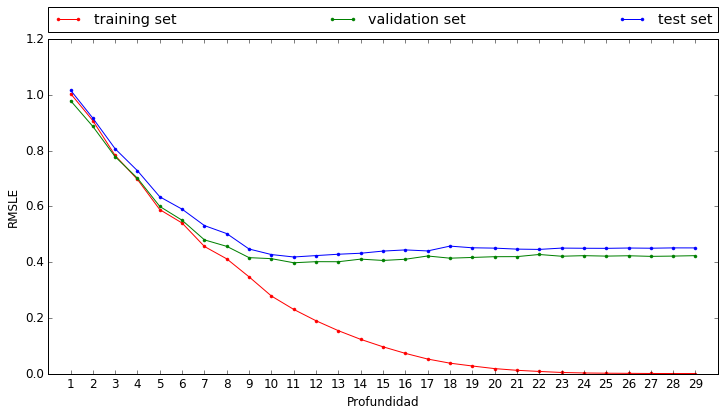

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,init_max_depth+1),scores_train,'r.-',label='training set')
plt.plot(range(1,init_max_depth+1),scores_val,'g.-', label='validation set')
plt.plot(range(1,init_max_depth+1),scores_test,'b.-', label='test set')

plt.xticks(range(1,init_max_depth+1))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Profundidad')
plt.ylabel('RMSLE')
plt.show()

Al comparar los valores verdaderos y de predicción se puede ver que aún se notan las alineaciones horizontales, sin embargo, se puede ver como los valores se aproximan más al valor verdadero y se nota una menor dispersión de los datos.

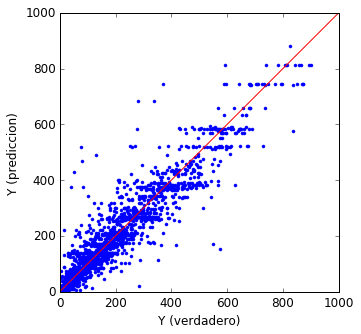

In [24]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

# SVM No Lineal

>(e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM sería
aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables
categóricas en un modo apropiado -por ejemplo como vector binario con un 1 en la posición del
valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables.
Usando parámetros por defecto para la SVM debiese obtener un score del orden de 0.344, quedando
definitivamente en el top-10 de la competencia.

Se utilizó una SVM no lineal con parámetros por defecto para el aprendizaje de los datos. Se llevaron a cabo dos pre-procesamiento.

Primero, se transformaron las variables categóricas en variables indicatrices que toman el valor 1 (si un ejemplo corresponde a cierta categoría o en la variable original tomaba cierto valor). Segundo, se escalaron y normalizaron los datos. Tercero, para el entrenamiento se transformó la respuesta aplicando el logaritmo, aplicando la función inversa (exponencial) antes de calcular el *RMSLE*.

Se entrenó la SVM no lineal para la primera representación que solo consideraba la hora.

In [6]:
features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour']
#features = ['season','holiday','workingday','weather','temp',
#            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour'])
Ydf=df.ix[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

Y_log_train = np.log(Y_train)

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_log_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Los puntajes *RMSLE* obtenido por la SVM no lineal fueron de 0.3640 para el conjunto de entrenamiento, de 0.4162 para el conjunto de validación y de 0.4363 para el conjunto de pruebas. 

Al usar las características iniciales, la SVM no lineal obtiene un puntaje muy similar al obtenido por los arboles de regresión, pero éstos últimos, necesitaron incluir las características de día de semana y año-mes.

In [9]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

Y_pred_train = np.exp(Y_pred_train)
Y_pred_val = np.exp(Y_pred_val)
Y_pred_test = np.exp(Y_pred_test)

#print "SCORE TRAIN=\t%f"%model.score(X_train,Y_log_train)
#print "SCORE VALID=\t%f"%model.score(X_val,Y_log_val)
#print "SCORE TEST=\t%f"%model.score(X_test,Y_log_test)

print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

KAGG EVAL TRAIN =	0.364040
KAGG EVAL VALID =	0.416222
KAGG EVAL TEST =	0.436345


Al comparar los valores verdaderos con los predichos se nota cierta dispersión de los datos aunque en general la forma de esta dispersión se asemeja a la recta de igualdad. La SVM no lineal también logra predecir valores bajos cuando esos corresponden.

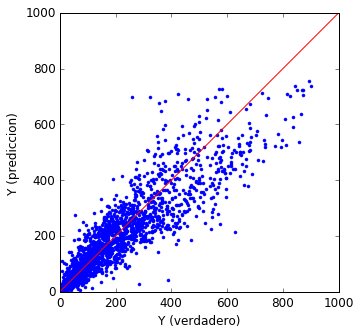

In [27]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

In [14]:
features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','yearmonth'])
Ydf=df.ix[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

Y_log_train = np.log(Y_train)

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_log_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Los puntajes *RMSLE* obtenido por la SVM no lineal fueron de 0.2210 para el conjunto de entrenamiento, de 0.3044 para el conjunto de validación y de 0.3382 para el conjunto de pruebas. Al incluir las nuevas características se consigue mejorar aún más el rendimiento de la SVM no lineal.

In [15]:
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

Y_pred_train = np.exp(Y_pred_train)
Y_pred_val = np.exp(Y_pred_val)
Y_pred_test = np.exp(Y_pred_test)

#print "SCORE TRAIN=\t%f"%model.score(X_train,Y_log_train)
#print "SCORE VALID=\t%f"%model.score(X_val,Y_log_val)
#print "SCORE TEST=\t%f"%model.score(X_test,Y_log_test)

print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

KAGG EVAL TRAIN =	0.221096
KAGG EVAL VALID =	0.304443
KAGG EVAL TEST =	0.338216


Se puede ver que ahora los datos se asemejan aún más a los verdaderos. Se nota una cierta tendencia a sub-estimar el valor de la predicción probablemente producto de la aplicación del logaritmo en el entrenamiento.

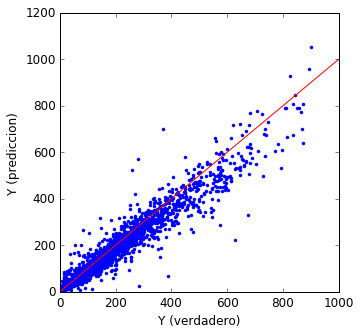

In [16]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

>(f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la
máquina ($C$, $\epsilon$ o la misma función de kernel). Naturalmente, está absolutamente prohibido tomar este
tipo de decisiones de diseño mirando el resultado de pruebas. Debe realizar estas elecciones evaluando
sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento.

Para la mejora de la SVM se uso un método iterativo para encontrar los mejores parámetros $C$ y $\epsilon$. Para $C$ se probó el rango $C \in [0.8,4.0]$ mientras que para $\epsilon$ se probó con $\epsilon \in [0.0001,0.1]$

Se puede notar que en realidad el *RMSLE* no varía demasiado con los distintos parámetros logrando un máximo de 0.3405 para el conjunto de pruebas.

De todas formas la mejor combinación de parámetros fue usando $C=1.714$ y $\epsilon=0.01$ obteniendo un *RMSLE* de 0.1891 para el conjunto de entrenamiento, 0.2998 para el conjunto de validación y de 0.3339 para el conjunto de pruebas mejorando ligeramente el error respecto de los parámetros por defecto.

In [17]:
import datetime
#Demora bastante en su ejecución
def get_best_svr(X_train,Y_train,X_val,Y_val,X_test,Y_test, printinfo=True):
    Y_log_train = np.log(Y_train)


    best_model = SVR()
    best_score = float('inf')
    best_epsilon = 0.01
    best_C = 1.0

    possible_C = np.linspace(0.8,4.0,8)#[0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 4.0]
    possible_epsilon = np.logspace(-5,-1,5)#[0.00001,0.0001,0.001,0.01]

    for C_i in possible_C:
        for eps_i in possible_epsilon:
            if printinfo: 
                print datetime.datetime.now().time() #para rastrear el paso del tiempo
                print "Epsilon=%f, C=%f"%(eps_i,C_i)

            model = SVR(epsilon=eps_i,C=C_i)
            model.fit(X_train,Y_log_train)

            Y_pred_train = model.predict(X_train)
            Y_pred_val = model.predict(X_val)
            Y_pred_test = model.predict(X_test)

            Y_pred_train = np.exp(Y_pred_train)
            Y_pred_val = np.exp(Y_pred_val)
            Y_pred_test = np.exp(Y_pred_test)

            #print "SCORE TRAIN=\t%f"%model.score(X_train,Y_sqrt_train)
            #print "SCORE VALID=\t%f"%model.score(X_val,Y_sqrt_val)
            #print "SCORE TEST=\t%f"%model.score(X_test,Y_sqrt_test)

            if printinfo: 
                print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
                print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
                print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

            if (eval_bikemodel(Y_pred_val,Y_val) < best_score):
                best_score = eval_bikemodel(Y_pred_val,Y_val)
                best_epsilon = eps_i
                best_C = C_i
                best_model = model
    return best_model, best_epsilon, best_C

model,best_epsilon, best_C = get_best_svr(X_train,Y_train,X_val,Y_val,X_test,Y_test)
#model = SVR(C=1,epsilon=0.01)
#model.fit(X_train,Y_log_train)
#best_epsilon = 0.01
#best_C = 1
print "Mejores parametros encontrados: epsilon=%f, C=%f"%(best_epsilon,best_C)

Y_log_train = np.log(Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

Y_pred_train = np.exp(Y_pred_train)
Y_pred_val = np.exp(Y_pred_val)
Y_pred_test = np.exp(Y_pred_test)

#print "SCORE TRAIN=\t%f"%model.score(X_train,Y_sqrt_train)
#print "SCORE VALID=\t%f"%model.score(X_val,Y_sqrt_val)
#print "SCORE TEST=\t%f"%model.score(X_test,Y_sqrt_test)

print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

12:23:15.382750
Epsilon=0.000010, C=0.800000
KAGG EVAL TRAIN =	0.231934
KAGG EVAL VALID =	0.306151
KAGG EVAL TEST =	0.337958
12:23:43.722961
Epsilon=0.000100, C=0.800000
KAGG EVAL TRAIN =	0.231932
KAGG EVAL VALID =	0.306150
KAGG EVAL TEST =	0.337962
12:24:20.558093
Epsilon=0.001000, C=0.800000
KAGG EVAL TRAIN =	0.231893
KAGG EVAL VALID =	0.306120
KAGG EVAL TEST =	0.337942
12:24:56.534296
Epsilon=0.010000, C=0.800000
KAGG EVAL TRAIN =	0.231549
KAGG EVAL VALID =	0.305980
KAGG EVAL TEST =	0.337839
12:25:30.311728
Epsilon=0.100000, C=0.800000
KAGG EVAL TRAIN =	0.234950
KAGG EVAL VALID =	0.308676
KAGG EVAL TEST =	0.341888
12:25:51.172605
Epsilon=0.000010, C=1.257143
KAGG EVAL TRAIN =	0.206215
KAGG EVAL VALID =	0.301387
KAGG EVAL TEST =	0.334930
12:26:31.596123
Epsilon=0.000100, C=1.257143
KAGG EVAL TRAIN =	0.206210
KAGG EVAL VALID =	0.301385
KAGG EVAL TEST =	0.334935
12:27:11.710902
Epsilon=0.001000, C=1.257143
KAGG EVAL TRAIN =	0.206149
KAGG EVAL VALID =	0.301366
KAGG EVAL TEST =	0.334919


El gráfico de comparación de los valores predichos y verdaderos no cambia demasiado se nota un patrón similar al obtenido por la máquina usando parámetros por defecto.

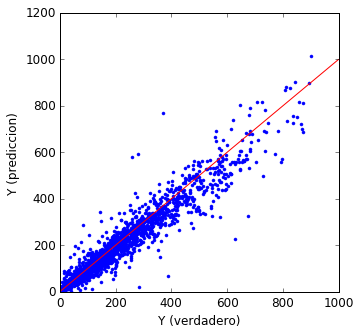

In [18]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

# Validación cruzada

>(g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros
estructurales del árbol de regresión y la SVM usando validación cruzada. El código de ejemplo para
esto ha sido proporcionado en las tareas 1 y 2, pero se adjunta de nuevo a continuación

En esta sección se aplicó validación cruzada para la obtención de los parámetros para el árbol de regresión y para la SVM no lineal.

In [32]:
from sklearn import cross_validation

def evaluate_cv(model, X_train, Y_train, kn=10, log = False):
    k_fold = cross_validation.KFold(len(X_train),kn)
    score_cv = 0
    
    for k, (train, val) in enumerate(k_fold):
        if log: model.fit(X_train[train], np.log(Y_train[train]))
        else: model.fit(X_train[train], Y_train[train])
        Ypred_val = model.predict(X_train[val])
        if log: Ypred_val = np.exp(Ypred_val)
        Ytrue_val = Y_train[val]
        score_fold = eval_bikemodel(Ypred_val,Ytrue_val)
        score_cv += score_fold
        print "Fold cv %f"%score_fold
    score_cv = score_cv / kn
    print score_cv
    return score_cv

## CV en árbol de regresión

Al hacer uso de validación cruzada para seleccionar la máxima profundidad del árbol se obtiene que la profundidad ideal usando este criterio es de 11 niveles. Al entrenar el árbol usando este valor para el parámetro el error de entrenamiento disminuye bastante hasta al alcanzar un *RMSLE* de 0.0099. El *RMSLE* en el conjunto de pruebas es 0.4375 lo cual es ligeramente superior al usar 10 niveles.

In [29]:
def get_best_tree_cv(X_train,Y_train,X_test,Y_test):
	model = Tree(random_state=0)
	score = evaluate_cv(model, X_train, Y_train)
	print "KAGG CV SCORE =\t%f"%score

	model.fit(X_train,Y_train)
	Y_pred_train = model.predict(X_train)
	#Y_pred_val = model.predict(X_val)
	Y_pred_test = model.predict(X_test)
	print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)	
	print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)	

	init_max_depth =  model.tree_.max_depth 
	best_score = score
	best_depth = init_max_depth #La profundidad del arbol sin limite

	cv_scores = []
	scores_train = []
	scores_test = []

	#Buscamos la mejor profundidad
	for depth in range(1,init_max_depth + 1):
		model = Tree(random_state=0,max_depth=depth)
		score = evaluate_cv(model, X_train, Y_train)
		print "Depth %f - KAGG CV SCORE =\t%f"%(depth,score)
		cv_scores.append(score)

		model.fit(X_train,Y_train)
		Y_pred_train = model.predict(X_train)
		Y_pred_test = model.predict(X_test)
		scores_train.append(eval_bikemodel(Y_pred_train,Y_train))
		scores_test.append(eval_bikemodel(Y_pred_test,Y_test))
		if score <= best_score :
			best_depth = depth
			best_score = score

	model = Tree(random_state=0,max_depth=best_depth)
	model.fit(X_train,Y_train)
	return model, best_depth, init_max_depth, scores_train, scores_test

features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]
Ydf=df.ix[:,'count']
X_train = Xdf[0:nval].values
X_test = Xdf[nval:].values

Y_train = Ydf[0:nval].values
Y_test = Ydf[nval:].values

model, best_depth, init_max_depth, scores_train, scores_test = get_best_tree_cv(X_train,Y_train,X_test,Y_test)

print "Best depth:%d"%best_depth

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

Fold cv 0.662681
Fold cv 0.470448
Fold cv 0.463451
Fold cv 0.514659
Fold cv 0.439240
Fold cv 0.403926
Fold cv 0.448854
Fold cv 0.424701
Fold cv 0.442523
Fold cv 0.359846
0.463032968996
KAGG CV SCORE =	0.463033
KAGG EVAL TRAIN =	0.009944
KAGG EVAL TEST =	0.437461
Fold cv 1.590705
Fold cv 0.891457
Fold cv 0.864467
Fold cv 1.039958
Fold cv 0.962645
Fold cv 0.822867
Fold cv 0.821363
Fold cv 1.104318
Fold cv 0.948554
Fold cv 0.802554
0.984888715519
Depth 1.000000 - KAGG CV SCORE =	0.984889
Fold cv 1.410406
Fold cv 0.813917
Fold cv 0.781862
Fold cv 0.906860
Fold cv 0.899997
Fold cv 0.753032
Fold cv 0.752925
Fold cv 0.999774
Fold cv 0.868880
Fold cv 0.746326
0.893398009447
Depth 2.000000 - KAGG CV SCORE =	0.893398
Fold cv 1.247567
Fold cv 0.733307
Fold cv 0.710392
Fold cv 0.803185
Fold cv 0.773841
Fold cv 0.659076
Fold cv 0.660620
Fold cv 0.874973
Fold cv 0.775653
Fold cv 0.643760
0.78823741842
Depth 3.000000 - KAGG CV SCORE =	0.788237
Fold cv 1.148613
Fold cv 0.621718
Fold cv 0.651881
Fold c

Al comparar el puntaje obtenido por validación cruzada respecto de la profundidad máxima para el árbol podemos ver que ocurre algo similar que al usar un método iterativo, el *RMSLE* primero desciende en ambos conjuntos hasta que en los 8 o 9 niveles de profundidad para el árbol solo sigue descendiendo en el conjunto de entrenamiento mientras que se estanca en el conjunto de pruebas.

Podría haber sido el azar el que hizo que el error con los niveles escogidos por validación cruzada fuera peor que el otro método sobretodo tratándose de una diferencia pequeña.

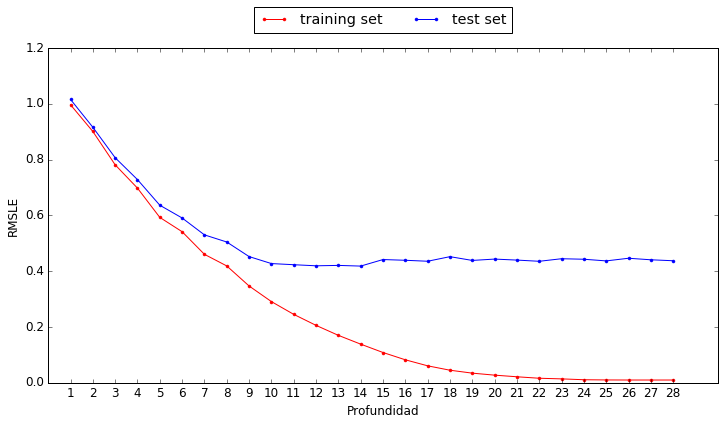

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,init_max_depth+1),scores_train,'r.-',label='training set')
plt.plot(range(1,init_max_depth+1),scores_test,'b.-', label='test set')

plt.xticks(range(1,init_max_depth+1))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=9,
           ncol=2, borderaxespad=0.)

plt.xlabel('Profundidad')
plt.ylabel('RMSLE')
plt.show()

Al ver la predicción y el valor verdadero se puede observar el mismo fenómeno de los alineamientos horizontales que se ha observado al hacer uso de árboles de regresión en las secciones anteriores. 

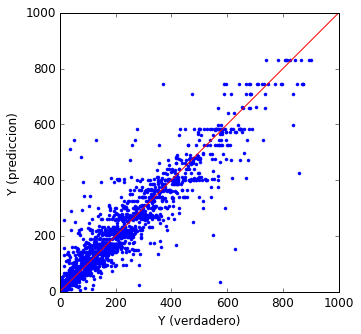

In [34]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

## CV en SVM no lineal

Se aplicó validación cruzada para seleccionar los mejores parámetros para $C$ y $\epsilon$ para la SVM no lineal con k=5 folds. Se buscó para $C \in [0.8,0.4]$ y $\epsilon \in [0.001, 0.1]$. La búsqueda de parámetros es menos precisa que el método iterativo antes usado (hay menos posibles valores a probar) debido al alto el tiempo de ejecución que toma entrenar la SVM para un cierto set de datos, y por tanto, obtener el puntaje de cada fold.

La combinación de parámetros escogida fue $C=1.8667$ y $\epsilon=0.01$, parámetros similares a los escogidos previamente. Con estos parámetros el *RMSLE* es de 0.1878 para el conjunto de entrenamiento y de 0.3131 para el conjunto de pruebas logrando una mejora en el rendimiento. Esta mejora es gracias a que se puede aprovechar los datos del conjunto de validación en el entrenamiento de la SVM no lineal lo cual permite una predicción más precisa.

In [33]:
import datetime
#Este procedimiento demora en su ejecución
def get_best_svr_cv(X_train,Y_train,X_test,Y_test):
	#Y_log_train = np.log(Y_train)
	#Y_log_test = np.log(Y_test)

	best_model = SVR()
	best_score = float('inf')
	best_epsilon = 0.01
	best_C = 1.0

	possible_C = np.linspace(0.8,4.0,4)#[0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 4.0]
	possible_epsilon = np.logspace(-3,-1,3)#[0.001,0.01,0.1]

	for C_i in possible_C:
		for eps_i in possible_epsilon:
			print datetime.datetime.now().time()
			print "Epsilon=%f, C=%f"%(eps_i,C_i)

			model = SVR(epsilon=eps_i,C=C_i)
			score = evaluate_cv(model, X_train, Y_train, kn=5, log = True)

			model.fit(X_train,np.log(Y_train))

			Y_pred_train = model.predict(X_train)
			Y_pred_test = model.predict(X_test)

			Y_pred_train = np.exp(Y_pred_train)
			Y_pred_test = np.exp(Y_pred_test)
			
			print "CV SCORE=\t%f"%score
			print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
			print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)
			
			if (score < best_score):
				best_score = score
				best_epsilon = eps_i
				best_C = C_i
				best_model = model
	return best_model, best_epsilon, best_C

features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday','yearmonth'])
Ydf=df.ix[:,'count']

X_train = Xdf[0:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:nval].values
Y_test = Ydf[nval:].values

#Y_log_train = np.log(Y_train)

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

model, best_epsilon, best_c = get_best_svr_cv(X_train,Y_train,X_test,Y_test)
print '\nMejores parametros encontrados:C=%f, epsilon=%f'%(best_c,best_epsilon)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

Y_pred_train = np.exp(Y_pred_train)
Y_pred_test = np.exp(Y_pred_test)

print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
#print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)


14:32:58.880649
Epsilon=0.001000, C=0.800000
Fold cv 0.370394
Fold cv 0.319017
Fold cv 0.296776
Fold cv 0.308406
Fold cv 0.293496
0.317617743261
CV SCORE=	0.317618
KAGG EVAL TRAIN =	0.227044
KAGG EVAL TEST =	0.319304
14:36:51.755824
Epsilon=0.010000, C=0.800000
Fold cv 0.370070
Fold cv 0.318669
Fold cv 0.296461
Fold cv 0.308077
Fold cv 0.293259
0.31730736727
CV SCORE=	0.317307
KAGG EVAL TRAIN =	0.226779
KAGG EVAL TEST =	0.319046
14:40:51.355782
Epsilon=0.100000, C=0.800000
Fold cv 0.368621
Fold cv 0.320858
Fold cv 0.300457
Fold cv 0.310710
Fold cv 0.293907
0.31891085991
CV SCORE=	0.318911
KAGG EVAL TRAIN =	0.229398
KAGG EVAL TEST =	0.319826
14:43:19.619251
Epsilon=0.001000, C=1.866667
Fold cv 0.359240
Fold cv 0.313001
Fold cv 0.291717
Fold cv 0.299057
Fold cv 0.283637
0.309330452173
CV SCORE=	0.309330
KAGG EVAL TRAIN =	0.188665
KAGG EVAL TEST =	0.313629
14:48:49.680071
Epsilon=0.010000, C=1.866667
Fold cv 0.358600
Fold cv 0.312426
Fold cv 0.290988
Fold cv 0.298753
Fold cv 0.282958
0.30

Al comparar el valor predicho con el verdadero se puede observar que los puntos están más cerca de la línea que al usarse el método iterativo y no se nota esa tendencia valores inferiores. Aún hay algunos valores alejados de la masa principal, pero ya no son tan notorios.

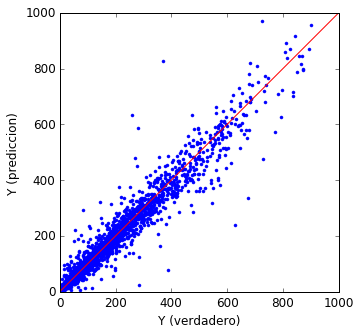

In [34]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

# Ensamblado

>(h) Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda total de bicicletas. Un modelo se especializaría en la predicción de la demanda de bicicletas de parte de usuarios registrados y otra en la predicción de la demanda de usuarios casuales. Hay razones claras para pensar que los patrones son distintos.

Se pueden utilizar varias máquinas en lugar de una sola para mejorar el aprendizaje. En esta sección se trabajaran con puedendos máquinas, una predecirá la demanda por usuarios registrados y otra por usuarios casuales. La suma de ambos debería dar el total de bicicletas.

Por lo que se entrenaron dos arboles de regresión y a cada uno se le busco su mejor profundidad con el método iterativo usado previamente. La suma de sus predicciones corresponde a la predicción de la renta total de bicicletas que es la respuesta que se esta buscando.

Se puede observar que al usar los dos árboles se obtiene un *RMSLE* de 0.2480 para el conjunto de entrenamiento, de 0.3501 para el conjunto de validación y de 0.3855 para el conjunto de pruebas. Con lo que al usar dos árboles de regresión se mejora el rendimiento sobre los conjuntos de validación y de pruebas en comparación a usar solo un árbol.

Esto puede deberse a la diferencia en comportamiento de los usuarios registrados y casuales.

In [14]:
features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]

Ydf=df.ix[:,'count']
Ydf_r=df.ix[:,'registered']
Ydf_c=df.ix[:,'casual']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

Y_train_r = Ydf_r[0:ntrain].values
Y_val_r = Ydf_r[ntrain:nval].values
Y_test_r = Ydf_r[nval:].values

Y_train_c = Ydf_c[0:ntrain].values
Y_val_c = Ydf_c[ntrain:nval].values
Y_test_c = Ydf_c[nval:].values

model, best_depth, init_max_depth, scores_train, scores_val, scores_test = get_best_tree(X_train,Y_train,X_val,Y_val,X_test,Y_test)
model_r, best_depth, init_max_depth_r, scores_train_r, scores_val_r, scores_test_r = get_best_tree(X_train,Y_train_r,X_val,Y_val_r,X_test,Y_test_r)
model_c, best_depth, init_max_depth_c, scores_train_c, scores_val_c, scores_test_c = get_best_tree(X_train,Y_train_c,X_val,Y_val_c,X_test,Y_test_c)

Y_pred_train_r = model_r.predict(X_train)
Y_pred_val_r = model_r.predict(X_val)
Y_pred_test_r = model_r.predict(X_test)

Y_pred_train_c = model_c.predict(X_train)
Y_pred_val_c = model_c.predict(X_val)
Y_pred_test_c = model_c.predict(X_test)

Y_pred_train_e = Y_pred_train_c + Y_pred_train_r
Y_pred_val_e = Y_pred_val_c + Y_pred_val_r
Y_pred_test_e = Y_pred_test_c + Y_pred_test_r

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

print "Ensemble"
print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train_e,Y_train)
print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val_e,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test_e,Y_test)
print ""
print "Regular"
print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

Ensemble
KAGG EVAL TRAIN =	0.248023
KAGG EVAL VALID =	0.350094
KAGG EVAL TEST =	0.385529

Regular
KAGG EVAL TRAIN =	0.230824
KAGG EVAL VALID =	0.397986
KAGG EVAL TEST =	0.418708


Ambos árboles son bastante distintos partiendo por el número de niveles. El árbol de usuarios registrados cuenta con 10 niveles mientras que el de usuarios casuales con 9, variando el número de nodos y hojas acorde.

Es interesante el cambio en la importancia de las características. Aunque en ambos árboles la característica de hora sigue siendo la más importante, es más influyente en el árbol de usuarios registrados. Nuevamente puede deberse a que los usuarios registrados tienen esa alza para poder viajar y cumplir sus obligaciones. Esta idea es apoyada por el hecho de que también es importante si es un día de semana.

Se da una diferencia importante con las características de temperatura aparente (*atemp*) y año-mes (*yearmonth*). 

La temperatura aparente es importante para el árbol de usuarios casuales, mientras que no lo es para los usuarios registrados. Esto puede deberse a que los usuarios casuales utilizaran las bicicletas acorde a las condiciones meteorológicas puesto que sus viajes posiblemente sean más ociosos.

El año-mes en contraparte es importante para el árbol de usuarios registrados puesto que en fechas del año de trabajo o de clases este tipo de usuarios demandará más bicicletas que en el resto.

In [302]:
print "Árbol usuarios registrados:"

print 'Profundidad del árbol:',model_r.tree_.max_depth
print 'Número de nodos:',model_r.tree_.node_count
print 'Número de hojas:',len([x for x in model_r.tree_.children_left if x == -1])

print 'Importancia de características:'
for i in range(0,len(model_r.feature_importances_) ):
    print "\t%s:   \t%f"%(features[i],model_r.feature_importances_[i])
    
print ""
print "Árbol usuarios casuales:"
print 'Profundidad del árbol:',model_c.tree_.max_depth
print 'Número de nodos:',model_c.tree_.node_count
print 'Número de hojas:',len([x for x in model_c.tree_.children_left if x == -1])

print 'Importancia de características:'
for i in range(0,len(model_c.feature_importances_) ):
    print "\t%s:   \t%f"%(features[i],model_c.feature_importances_[i])

Árbol usuarios registrados:
Profundidad del árbol: 10
Número de nodos: 1541
Número de hojas: 771
Importancia de características:
	season:   	0.001712
	holiday:   	0.000225
	workingday:   	0.154955
	weather:   	0.014770
	temp:   	0.010453
	atemp:   	0.013877
	humidity:   	0.014684
	windspeed:   	0.001939
	hour:   	0.603628
	cday:   	0.015332
	yearmonth:   	0.168425

Árbol usuarios casuales:
Profundidad del árbol: 9
Número de nodos: 935
Número de hojas: 468
Importancia de características:
	season:   	0.000204
	holiday:   	0.000301
	workingday:   	0.178517
	weather:   	0.002418
	temp:   	0.082690
	atemp:   	0.202670
	humidity:   	0.049612
	windspeed:   	0.004836
	hour:   	0.401347
	cday:   	0.013573
	yearmonth:   	0.063832


Al comparar cualitativamente la predicción con el valor verdadero se puede ver que los valores se acercan más. Se nota ciertas alineaciones horizontales, pero tienen leves diferencias entre sí.

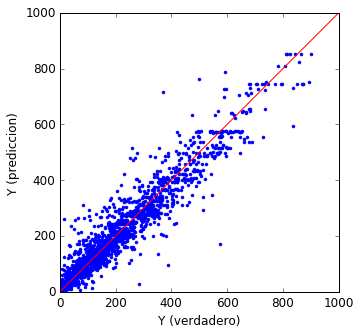

In [299]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test_e,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

>(i) Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir
la demanda total de bicicletas. Puede experimentar con una sola técnica (e.g. Random Forest), pero
por favor estudie y discuta la evolución del rendimiento (de entrenamiento y pruebas) a medida que
aumenta el número de máquinas.

En esta sección se evalúa el efecto de usar un regresor Random Forest. Se uso un método iterativo para encontrar el mejor número de estimadores $n \in \{1,2,...,15\}$. Se limitó la profundidad de los árboles a 11 para mantener cierta consistencia con los resultados anteriores. Se comprobó que fijar la profundidad a este valor da mejores resultados que de no hacerlo.

Así se generó un regresor Random Forest con 13 estimadores. El error *RMSLE* obtenido por este árbol fue de 0.2383 para el conjunto de entrenamiento, de 0.3432 para el conjunto de validación y de 0.3873 para el conjunto de pruebas. Se mejoró el rendimiento respecto del uso de un solo árbol de regresión, aunque no respecto del caso anterior de hacer uso de dos árboles que predijeran variables con distinto comportamiento.

In [18]:
from sklearn.ensemble import RandomForestRegressor

features = ['season','holiday','workingday','weather','temp',
            'atemp','humidity','windspeed','hour','cday','yearmonth']
Xdf=df.ix[:,features]

Ydf=df.ix[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

best_model = RandomForestRegressor(n_estimators=10,random_state=0)
best_n = 0
best_score = float('inf')

scores_train = []
scores_val = []
scores_test = []

for n in range(2,16):
    model = RandomForestRegressor(n_estimators=n,max_depth=11,random_state=0)
    model.fit(X_train,Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_val = model.predict(X_val)
    Y_pred_test = model.predict(X_test)

    #print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)	
    #print "KAGG EVAL VAL =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
    #print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

    scores_train.append(eval_bikemodel(Y_pred_train,Y_train))
    scores_val.append(eval_bikemodel(Y_pred_val,Y_val))
    scores_test.append(eval_bikemodel(Y_pred_test,Y_test))

    if eval_bikemodel(Y_pred_val,Y_val) < best_score:
        best_score = eval_bikemodel(Y_pred_val,Y_val)
        best_n = n
        best_model = model
        
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

print "Número de estimadores:",best_n

print "KAGG EVAL TRAIN =\t%f"%eval_bikemodel(Y_pred_train,Y_train)
print "KAGG EVAL VALID =\t%f"%eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TEST =\t%f"%eval_bikemodel(Y_pred_test,Y_test)

Número de estimadores: 13
KAGG EVAL TRAIN =	0.238330
KAGG EVAL VALID =	0.343221
KAGG EVAL TEST =	0.387333


Al comparar, se puede observar que el error tiende a disminuir levemente en todos los conjuntos conforme aumenta el número de estimadores estabilizándose cerca de los 8 estimadores y oscilando levemente de ahí adelante.

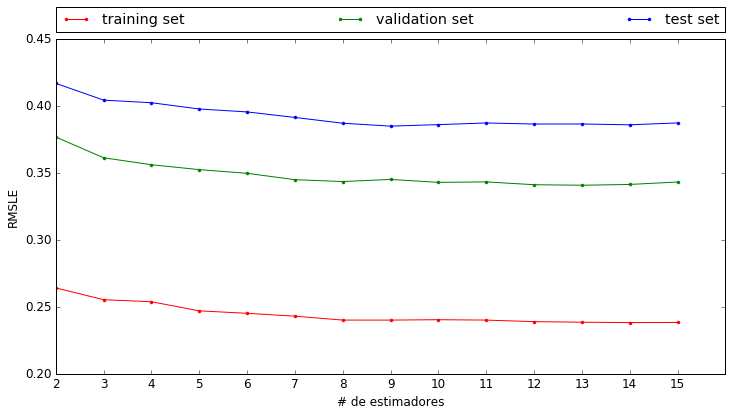

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(2,16),scores_train,'r.-',label='training set')
plt.plot(range(2,16),scores_val,'g.-', label='validation set')
plt.plot(range(2,16),scores_test,'b.-', label='test set')

plt.xticks(range(2,16))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('# de estimadores')
plt.ylabel('RMSLE')
plt.show()

Al analizar la importancia de las características entregada por Random Forest se puede ver que la característica más importante sigue siendo la hora, seguido por el año-mes, si es día de trabajo y por último la temperatura aparente. Esto es consistente con árboles vistos previamente.

In [21]:
print 'Importancia de características:'
for i in range(0,len(model.feature_importances_) ):
    print "\t%s:   \t%f"%(features[i],model.feature_importances_[i])

Importancia de características:
	season:   	0.001626
	holiday:   	0.001851
	workingday:   	0.066594
	weather:   	0.014656
	temp:   	0.033602
	atemp:   	0.045893
	humidity:   	0.021783
	windspeed:   	0.004764
	hour:   	0.612279
	cday:   	0.037173
	yearmonth:   	0.159777


Al comparar la predicción con el valor verdadero se puede notar que a pesar del uso de árboles de regresión ya no se observa la alineación horizontal que se producía anteriormente. Esto puesto que los árboles generados deben ser lo suficientemente distintos entre si como para evitar ese fenómeno.

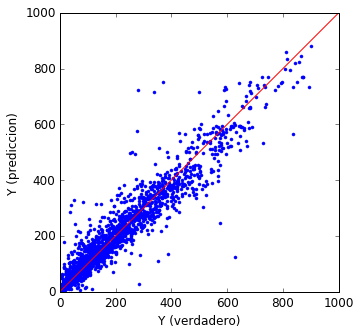

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot(range(0,1000),range(0,1000),'r')
plt.xlabel('Y (verdadero)')
plt.ylabel('Y (prediccion)')
plt.show()

# Conclusiones

Se entrenaron varios regresores para un problema de predicción de renta de bicicletas. El problema contaba con el número de rentas hechas por usuarios para cada hora del día, además de incluir factores meteorológicos y de calendario.

Entre los predictores usados se encuentran: Árbol de regresión, SVM no lineal, árboles de regresión ensamblados y random forest. 

Se probó el ajuste de parámetros de árbol de regresión y SVM no lineal tanto con un método iterativo buscando el mejor error sobre un conjunto de validación y aplicando validación cruzada.

El mejor *RMSLE* para el conjunto de pruebas obtenido fue de 0.4187 con una profundidad de 11 niveles y usando el método iterativo para encontrar la mejor profundidad. Para el árbol de regresión se podía observar un sobre-ajuste a medida que se incluían más niveles. Aprovechar incluir más datos en el entrenamiento haciendo uso de validación cruzada no pareciera haber mejorado el rendimiento.

En contraste, para el SVM no lineal el mejor *RMSLE* para el conjunto de pruebas fue de 0.3131 con un $C=1.8667$ y $\epsilon=0.01$ parámetros encontrados haciendo uso de validación cruzada con 5 folds. La SVM pudo aprovechar mucho mejor la inclusión de los datos del conjunto de validación en el entrenamiento. No obstante, el tiempo de ejecución de hacer validación cruzada era bastante alto a pesar del bajo número de folds.

También se mostró que usar dos arboles de regresión entrenados sobre las variables de usuarios registrados y casuales de forma independiente se lograba mejorar el rendimiento. En este caso se logró un *RMSLE* de 0.3855 sobre el conjunto de pruebas mejorando el resultado encontrado por el árbol de regresión entrenado para predecir la variable de rentas totales. Esto se debe a que los comportamiento de los dos tipos de usuarios pueden variar considerablemente.

Finalmente Random Forest logró conseguir un *RMSLE* de 0.3873 sobre el conjunto de pruebas, con 13 estimadores de profundidad máxima 11, mejorando el resultado de usar un solo árbol de regresión aún cuando se entrenaron todos estos estimadores para la misma variable. 